In [31]:
# Grafica la superposición de dos ondas con frecuencias y número de onda
# ligermanete diferentes, junto con su envolvente.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Enable interactive plot.
%matplotlib widget


In [176]:
# Grafica el carrier y la envolvente.
def graph( L = 100, T = 600, s = 1, dnu = 0.005,
    dks = 0.02, n = 200, t = 5000, lim = 200 ):

    # Enable interactive plot
    %matplotlib widget

    t = int( 4 * np.pi / dnu )

    # Diferenciales de número de onda y de frecuencia.
    ks = ( 2.0 * np.pi * s ) / L
    nu = ( 2.0 * np.pi ) / T
    
    x = np.linspace( -lim, lim, n )

    # Graficamos.
    plt.style.use('seaborn-pastel')
    fig = plt.figure()
    ax = plt.axes(xlim=(-lim, lim), ylim=(-2, 2))
    # Ejes.
    ax.hlines(y = 0, xmin = -lim, xmax = lim, color = "k")
    ax.vlines(x = 0, ymin = -2, ymax = 2, color = "k")
    
    # Objetos que contendrán las líneas.
    line = []
    line.append( ax.plot([], [], lw=3)[0] )
    line.append( ax.plot([], [], lw=3, color = "r")[0] )
    line.append( ax.plot([], [], lw=3, color = "r")[0] )

    # Inicializa el objeto de la onda.
    def init():
        for i in range( len(line) ):
            line[i].set_data([], [])
        return line

    # Grafica la onda para cada tiempo.
    def animate(i):
        y = []
        y.append( np.sin( ( ks + dks ) * x - ( nu + dnu ) * i )
            + np.sin( ( ks - dks ) * x - ( nu - dnu ) * i ) )
        y.append( 2 * np.sin( dks * x - dnu * i + np.pi/2 ) )
        y.append( -y[-1] )
        for i in range( len(line) ):
            line[i].set_data(x, y[i])
        return line

    # Crea la animación.
    anim = FuncAnimation( fig, animate, init_func = init,
        frames = t, interval = 1, blit = True )

    # Diferenciales.
    print(f"ks = {ks:.5f}")
    print(f"nu = {nu:.5f}")

    return anim

ks = 0.06283
nu = 0.01047


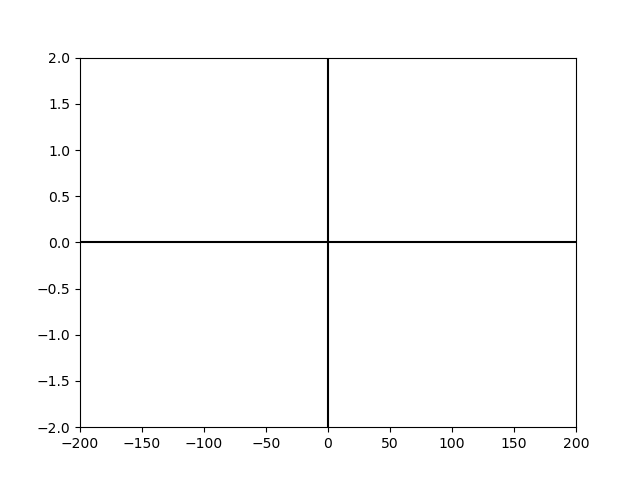

In [181]:
# Graficamos la onda.
graph(dks = 0.003, dnu = 0.005)